## Imports

In [1]:
import numpy  as np
import pandas as pd
import OurUtils as our
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Read data from CSV

In [2]:
# Read data
X_full = pd.read_csv('Reto 3-Dataset/reto3_trainX.csv', header=0, low_memory=False)
Y_full = pd.read_csv('Reto 3-Dataset/reto3_trainY.csv', header=0, low_memory=False)

## Split data into train and validation. 
Train split: 80%

Validation split: 20%

In [3]:
# Split into train and validation
valid_size = 0.2
seed = 1234
X_train, Y_train, X_valid, Y_valid = \
   our.single_stratified_split(X_full, Y_full, test_size=valid_size, random_state=seed)

## Scale data and perform PCA. 
Computes Principal Component Analysis and shows how many components there are. 9 components found for n_components=0.7.  

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_train)
X_proy, pca = our.our_PCA(X)
Y = Y_train.values.ravel()
num_of_pc = len(pca.singular_values_)
strTitle = '\n First %d principal components' %(num_of_pc)
print(strTitle)
print(pca.components_.T)
strTitle = '\n First %d singular values ' %(num_of_pc)
print(strTitle)
print(pca.singular_values_.T)
strTitle = '\n Explained Variance Ratio'
print(strTitle)
print(pca.explained_variance_ratio_.T)
strTitle = '\n Accumulated Explained Variance Ratio'
print(strTitle)
print(np.cumsum(pca.explained_variance_ratio_.T))

(92961, 9)

 First 9 principal components
[[ 1.14232061e-02 -1.66662092e-01 -1.53569339e-01 -1.34148739e-01
   4.33027047e-03  4.39481469e-02  2.00748534e-01  6.86155830e-02
  -4.13646495e-02]
 [-5.98923150e-02  1.07265622e-01  2.97571677e-01 -8.00264585e-01
  -1.52812681e-01 -1.81846760e-01 -5.47562516e-02 -4.60894248e-02
   1.56966747e-03]
 [-3.23421744e-02  4.91748061e-02  1.12116218e-01  6.47103895e-02
  -1.71554670e-02 -1.11661847e-01  1.30713961e-02 -1.89385804e-02
  -1.09111019e-01]
 [-2.33723778e-02 -7.79749920e-02  1.07434631e-02 -2.04892310e-02
  -6.73199664e-02  1.58267194e-02  1.12955914e-01 -3.18731603e-02
   7.83717572e-02]
 [-1.91150211e-02 -7.65252329e-03  3.39197427e-02  3.92915976e-03
  -3.50735633e-02 -2.45541476e-02  3.29858512e-02 -2.47711139e-02
   3.78967154e-03]
 [ 1.25352760e-01 -2.08090141e-01 -7.55076272e-02 -1.52650390e-01
  -8.72560007e-02 -8.95778512e-02 -8.72104223e-02  3.58418734e-02
   2.55775643e-04]
 [ 2.62534617e-02 -4.81002300e-02 -1.09479136e-01  1

## Data visualization using 2 and 3 first principal components. 
In this section the first two and three components are used to represent the dataset in 2D and 3D.
<ul>
    <li>class 1: 'bo'</li>
    <li>class 2: 'gx'</li>
    <li>class 3: 'rp'</li>
    <li>class 4: 'cD'</li>
    <li>class 5: 'm+'</li>
    <li>class 6: 'ys'</li>
    <li>class 7: 'kh'</li>
</ul>

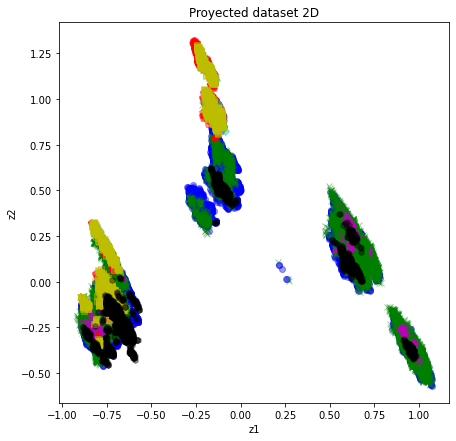

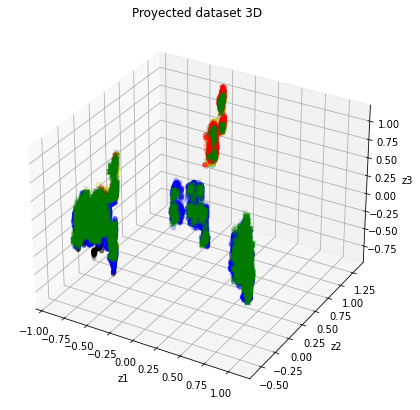

In [5]:
plt.rcParams['figure.figsize'] = [7,7] 

fig_number = 0
plot_proy2d = True
plot_proy3d = True

if plot_proy2d:
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind1 = Y==1
    ind2 = Y==2
    ind3 = Y==3
    ind4 = Y==4
    ind5 = Y==5
    ind6 = Y==6
    ind7 = Y==7
    plt.plot(X_proy[ind1,0], X_proy[ind1,1], 'bo', alpha=.4)
    plt.plot(X_proy[ind2,0], X_proy[ind2,1], 'gx', alpha=.4)
    plt.plot(X_proy[ind3,0], X_proy[ind3,1], 'rp', alpha=.4)
    plt.plot(X_proy[ind4,0], X_proy[ind4,1], 'cD', alpha=.4)
    plt.plot(X_proy[ind5,0], X_proy[ind5,1], 'm+', alpha=.4)
    plt.plot(X_proy[ind6,0], X_proy[ind6,1], 'ys', alpha=.4)
    plt.plot(X_proy[ind7,0], X_proy[ind7,1], 'kh', alpha=.4)
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('Proyected dataset 2D')

if plot_proy3d:
    from mpl_toolkits.mplot3d import Axes3D
    fig_number=fig_number+1
    fig = plt.figure(fig_number)
    ax = fig.add_subplot(111, projection='3d')
    ind1 = Y==1
    ind2 = Y==2
    ind3 = Y==3
    ind4 = Y==4
    ind5 = Y==5
    ind6 = Y==6
    ind7 = Y==7
    ax.scatter(X_proy[ind1,0],X_proy[ind1,1],X_proy[ind1,2], c='b',marker='o', alpha=.2)
    ax.scatter(X_proy[ind2,0],X_proy[ind2,1],X_proy[ind2,2], c='g',marker='x', alpha=.2)
    ax.scatter(X_proy[ind3,0],X_proy[ind3,1],X_proy[ind3,2], c='r',marker='p', alpha=.2)
    ax.scatter(X_proy[ind4,0],X_proy[ind4,1],X_proy[ind4,2], c='c',marker='D', alpha=.2)
    ax.scatter(X_proy[ind5,0],X_proy[ind5,1],X_proy[ind5,2], c='m',marker='+', alpha=.2)
    ax.scatter(X_proy[ind6,0],X_proy[ind6,1],X_proy[ind6,2], c='y',marker='s', alpha=.2)
    ax.scatter(X_proy[ind7,0],X_proy[ind7,1],X_proy[ind7,2], c='k',marker='h', alpha=.2)
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    plt.title('Proyected dataset 3D')

plt.show()

## Data visualization using LDA.
3 components used to represent 2D and 3D data.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = 3
lda = LinearDiscriminantAnalysis(n_components=n_components)
lda.fit(X,Y)
X_proy = lda.transform(X)
X_proy.shape

(92961, 3)

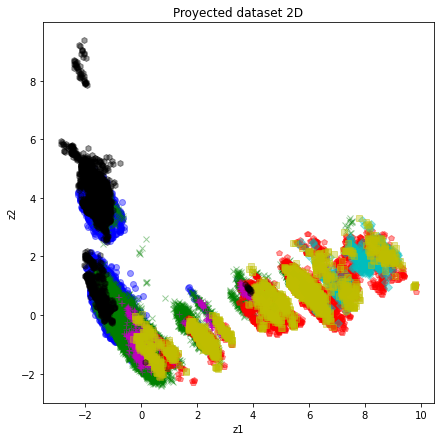

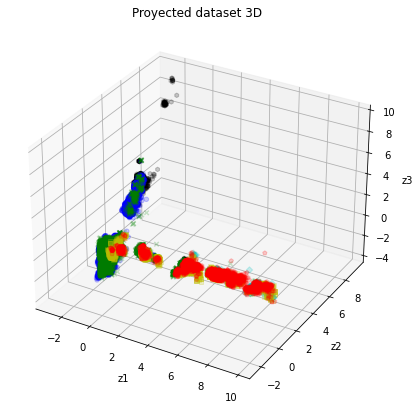

In [7]:
plt.rcParams['figure.figsize'] = [7,7] #<- this makes the figures larger in Jupyter

fig_number = 0
plot_proy2d = True
plot_proy3d = True

if plot_proy2d:
    fig_number=fig_number+1
    plt.figure(fig_number)
    ind1 = Y==1
    ind2 = Y==2
    ind3 = Y==3
    ind4 = Y==4
    ind5 = Y==5
    ind6 = Y==6
    ind7 = Y==7
    plt.plot(X_proy[ind1,0], X_proy[ind1,1], 'bo', alpha=.4)
    plt.plot(X_proy[ind2,0], X_proy[ind2,1], 'gx', alpha=.4)
    plt.plot(X_proy[ind3,0], X_proy[ind3,1], 'rp', alpha=.4)
    plt.plot(X_proy[ind4,0], X_proy[ind4,1], 'cD', alpha=.4)
    plt.plot(X_proy[ind5,0], X_proy[ind5,1], 'm+', alpha=.4)
    plt.plot(X_proy[ind6,0], X_proy[ind6,1], 'ys', alpha=.4)
    plt.plot(X_proy[ind7,0], X_proy[ind7,1], 'kh', alpha=.4)
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.title('Proyected dataset 2D')
    

if plot_proy3d:
    from mpl_toolkits.mplot3d import Axes3D
    fig_number=fig_number+1
    fig = plt.figure(fig_number)
    ax = fig.add_subplot(111, projection='3d')
    ind1 = Y==1
    ind2 = Y==2
    ind3 = Y==3
    ind4 = Y==4
    ind5 = Y==5
    ind6 = Y==6
    ind7 = Y==7
    ax.scatter(X_proy[ind1,0],X_proy[ind1,1],X_proy[ind1,2], c='b',marker='o', alpha=.2)
    ax.scatter(X_proy[ind2,0],X_proy[ind2,1],X_proy[ind2,2], c='g',marker='x', alpha=.2)
    ax.scatter(X_proy[ind3,0],X_proy[ind3,1],X_proy[ind3,2], c='r',marker='p', alpha=.2)
    ax.scatter(X_proy[ind4,0],X_proy[ind4,1],X_proy[ind4,2], c='c',marker='D', alpha=.2)
    ax.scatter(X_proy[ind5,0],X_proy[ind5,1],X_proy[ind5,2], c='m',marker='+', alpha=.2)
    ax.scatter(X_proy[ind6,0],X_proy[ind6,1],X_proy[ind6,2], c='y',marker='s', alpha=.2)
    ax.scatter(X_proy[ind7,0],X_proy[ind7,1],X_proy[ind7,2], c='k',marker='h', alpha=.2)
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.set_zlabel('z3')
    plt.title('Proyected dataset 3D')

plt.show()

## Random forest. 
Looking for the most important features using random forest.

feature 0 -> imporance = 0.26
feature 1 -> imporance = 0.00
feature 2 -> imporance = 0.00
feature 3 -> imporance = 0.00
feature 4 -> imporance = 0.00
feature 5 -> imporance = 0.05
feature 6 -> imporance = 0.00
feature 7 -> imporance = 0.00
feature 8 -> imporance = 0.00
feature 9 -> imporance = 0.03
feature 10 -> imporance = 0.04
feature 11 -> imporance = 0.01
feature 12 -> imporance = 0.01
feature 13 -> imporance = 0.15
feature 14 -> imporance = 0.01
feature 15 -> imporance = 0.03
feature 16 -> imporance = 0.00
feature 17 -> imporance = 0.02
feature 18 -> imporance = 0.00
feature 19 -> imporance = 0.02
feature 20 -> imporance = 0.00
feature 21 -> imporance = 0.00
feature 22 -> imporance = 0.00
feature 23 -> imporance = 0.08
feature 24 -> imporance = 0.00
feature 25 -> imporance = 0.08
feature 26 -> imporance = 0.00
feature 27 -> imporance = 0.00
feature 28 -> imporance = 0.00
feature 29 -> imporance = 0.00
feature 30 -> imporance = 0.00
feature 31 -> imporance = 0.00
feature 32 -> impo

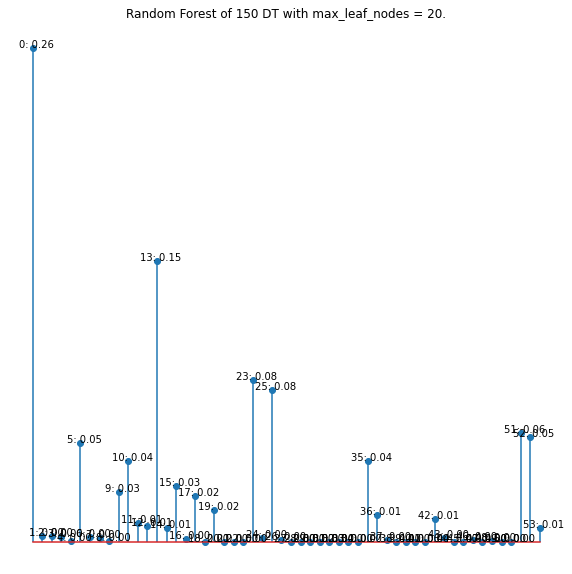

In [9]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

n_estimators = 150
max_leaf_nodes = 20
max_depth = 2

base_clf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth)#, class_weight=weights)
                                #max_leaf_nodes=max_leaf_nodes)

base_clf.fit(X, Y)

plt.rcParams['figure.figsize'] = [7,7]
num_of_features = X.shape[1]

for i in range(num_of_features):
    score = base_clf.feature_importances_[i]
    strResult = "feature %d -> imporance = %2.2f" %(i+1,score)
    print(strResult)
    
plt.stem(base_clf.feature_importances_)

for i in range(num_of_features):
    strImportance = "%d: %2.2f" %(i,base_clf.feature_importances_[i])
    plt.text(i+0.4, base_clf.feature_importances_[i], strImportance, horizontalalignment='center')

plt.axis('off')
plt.xlabel('Feature')
plt.ylabel('Importance')
strTitle = 'Random Forest of %d DT with max_leaf_nodes = %d.' %(n_estimators, max_leaf_nodes)
plt.title(strTitle)
plt.show()